In [1]:
import pandas as pd
df=pd.read_csv('d:/data/game/vgsales2.csv')
df.head()

,Rank,Name,Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,...,Simulation,Sports,Strategy,Years,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Label
0,11594,Samurai Warriors 2,Action,1,0,0,0,0,0,0,...,0,0,0,13,0.07,0.01,0.00,0.01,0.08,0
1,11593,P.N.03 - Product Number Three,Shooter,0,0,0,0,0,0,0,...,0,0,0,16,0.06,0.02,0.00,0.00,0.08,0
2,11592,Minecraft: Story Mode,Adventure,0,1,0,0,0,0,0,...,0,0,0,4,0.02,0.05,0.00,0.01,0.08,0
3,11591,Real Robots Final Attack,Shooter,0,0,0,0,0,0,0,...,0,0,0,21,0.00,0.00,0.07,0.01,0.08,0
4,11590,Pocket Dogs,Misc,0,0,0,1,0,0,0,...,0,0,0,15,0.06,0.02,0.00,0.00,0.08,0


In [2]:
df['Label'].value_counts() #총판매금액 평균미만 0 , 평균이상 1

0    12619
1     3705
Name: Label, dtype: int64

In [3]:
df.shape

(16324, 22)

In [4]:
cols=df.columns[3:20]
X=df[cols] #독립변수
y=df['Label'] #종속변수
X.head()

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Years,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,0,0,0,0,0,0,0,0,0,0,0,13,0.07,0.01,0.00,0.01
1,0,0,0,0,0,0,0,0,1,0,0,0,16,0.06,0.02,0.00,0.00
2,0,1,0,0,0,0,0,0,0,0,0,0,4,0.02,0.05,0.00,0.01
3,0,0,0,0,0,0,0,0,1,0,0,0,21,0.00,0.00,0.07,0.01
4,0,0,0,1,0,0,0,0,0,0,0,0,15,0.06,0.02,0.00,0.00


In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample = RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Label'])
df2=pd.concat([X_samp,y_samp],axis=1)

Using TensorFlow backend.


In [6]:
df2['Label'].value_counts()

1    3705
0    3705
Name: Label, dtype: int64

In [7]:
X=X_samp[cols]
y=y_samp['Label']

In [8]:
# 8:2 샘플링
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              stratify=y,random_state=10)

In [9]:
#svm 모형
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
#예측정확도
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9397773279352226
0.9345479082321188


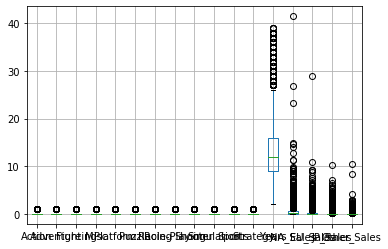

In [11]:
%matplotlib inline
X_train.boxplot() #정규화 전의 박스플롯

In [12]:
#표준화
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train - mean_on_train)/std_on_train
X_test_scaled=(X_test - mean_on_train)/std_on_train

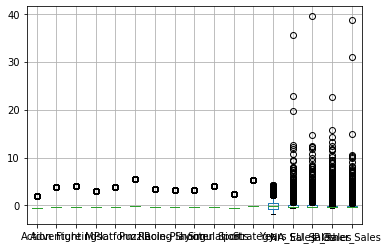

In [13]:
X_train_scaled.boxplot() #정규화 후의 박스플롯

In [14]:
model=SVC(random_state=10)
model.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
#예측정확도
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

0.9763832658569501
0.975033738191633


최적의 c: 1000
최적의 gamma: 0.01
최적의 정확도: 0.9946018893387314


<function matplotlib.pyplot.legend(*args, **kwargs)>

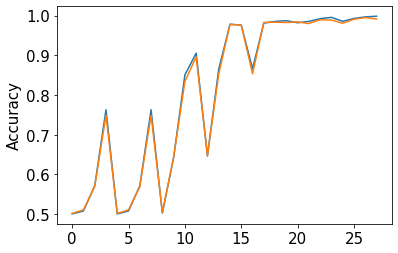

In [16]:
#최적의 C,gamma 도출
import numpy as np
import matplotlib.pyplot as plt
train_rate=[]
test_rate=[]
c_values=[0.001,0.001,0.1,1,10,100,1000]
g_values=[0.0001,0.001,0.01,0.1]
for n in c_values:
    for g in g_values:
        model=SVC(C=n, gamma=g, random_state=10)
        model.fit(X_train_scaled,y_train)
        train_rate.append([n,g,model.score(X_train_scaled,y_train)])
        test_rate.append([n,g,model.score(X_test_scaled,y_test)])
        
train_arr=np.array(train_rate)
test_arr=np.array(test_rate)
max_rate=np.max(test_arr[:,2])
idx=np.where(test_arr[:,2]==max_rate)[0][0]
print('최적의 c:',test_rate[idx][0])
print('최적의 gamma:',test_rate[idx][1])
print('최적의 정확도:',test_rate[idx][2])

plt.rcParams['font.size']=15
plt.plot(range(len(train_rate)),train_arr[:,2],label='Train')
plt.plot(range(len(test_rate)),test_arr[:,2],label='Test')
plt.ylabel('Accuracy')
plt.legend

In [17]:
#최적의 c:1000
#최적의 g:0.01
model=SVC(random_state=10,C=1000,gamma=0.01)
model.fit(X_train_scaled,y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
print('학습용:{:6.2f}%'.format(model.score(X_train_scaled,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test_scaled,y_test)*100))

학습용: 99.65%
검증용: 99.46%


In [19]:
#오분류표
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test_scaled)
cm=confusion_matrix(y_test,pred)
df_cm=pd.DataFrame(cm, index=[0,1],columns=[0,1])
df_cm

,0,1
0,733,8
1,0,741
